In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

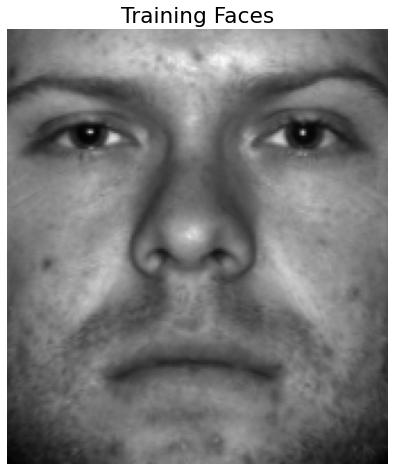

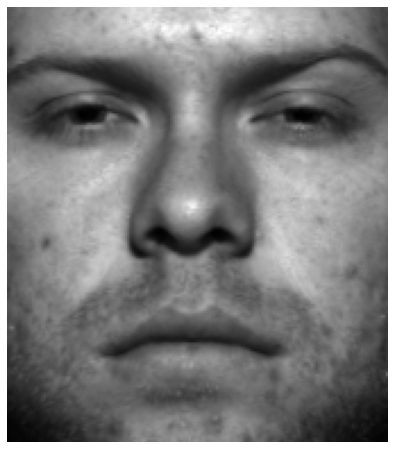

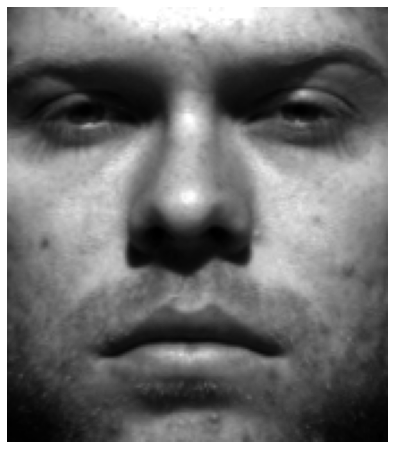

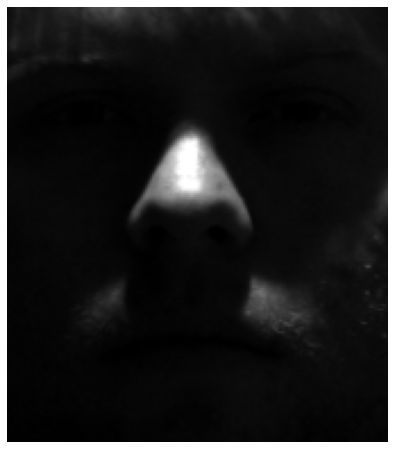

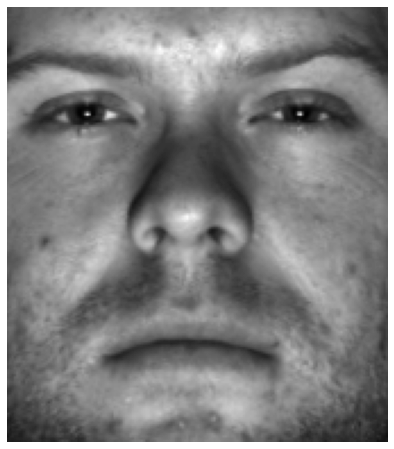

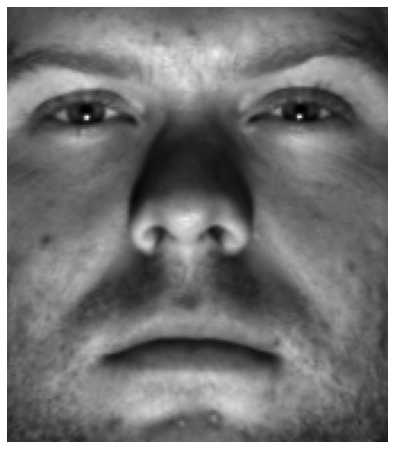

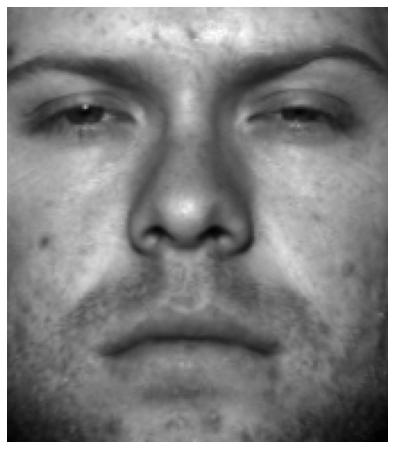

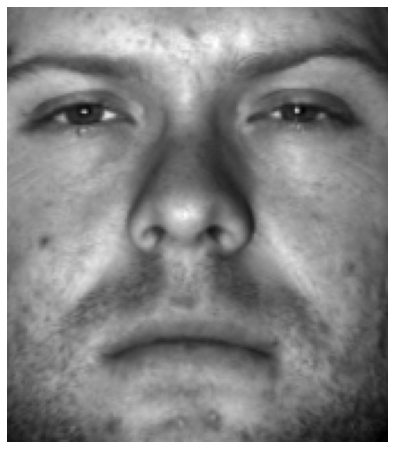

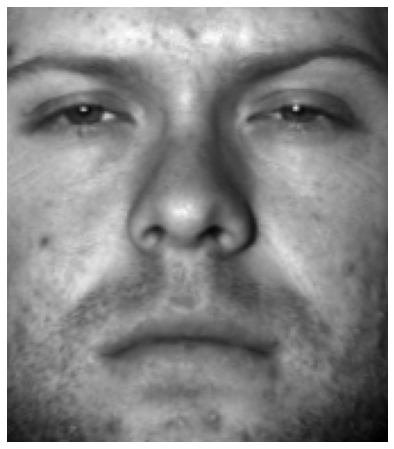

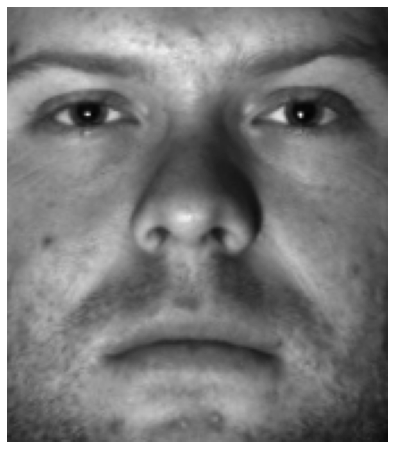

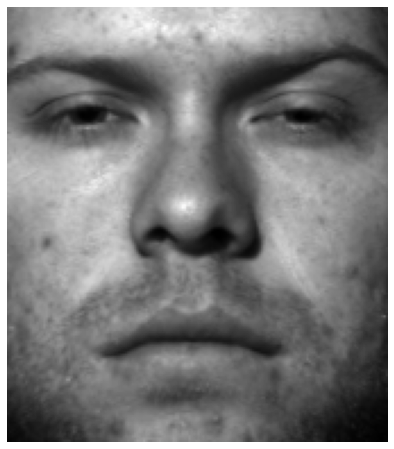

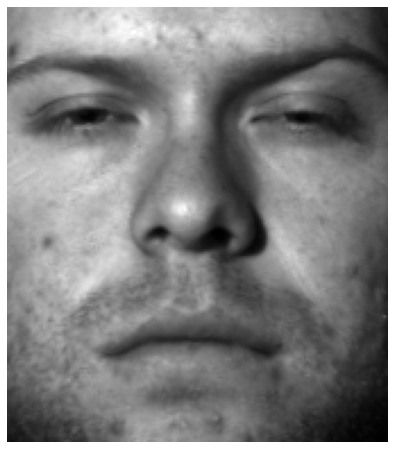

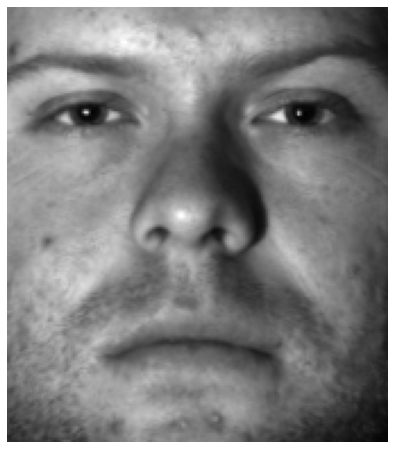

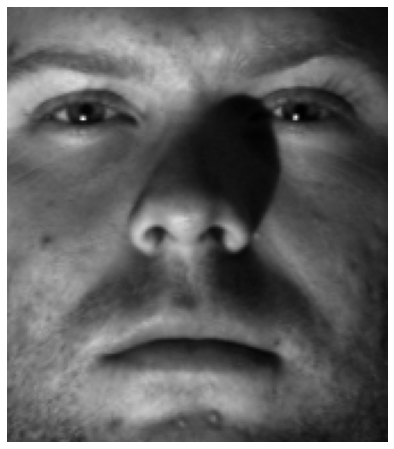

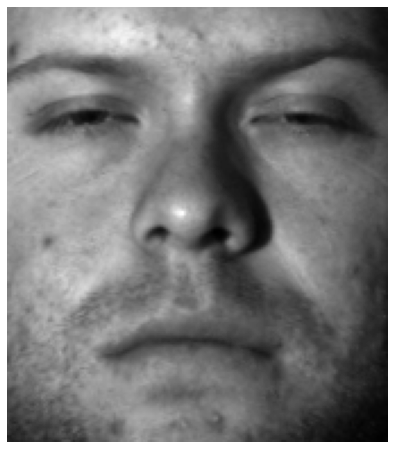

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat('/content/drive/My Drive/FCV_3/allFaces.mat')
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# Using 15 people for training data and plotting them
trainingFaces = faces[:,:np.sum(nfaces[:15])]

plt.title("Training Faces")
for i in range(15):
  img_u1 = plt.imshow(np.reshape(trainingFaces[:,i],(m,n)).T)
  img_u1.set_cmap('gray')
  plt.axis('off')
  plt.show()

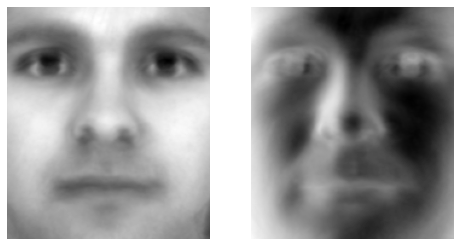

In [ ]:
# Compute eigenfaces on mean-subtracted training data
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')
plt.show()

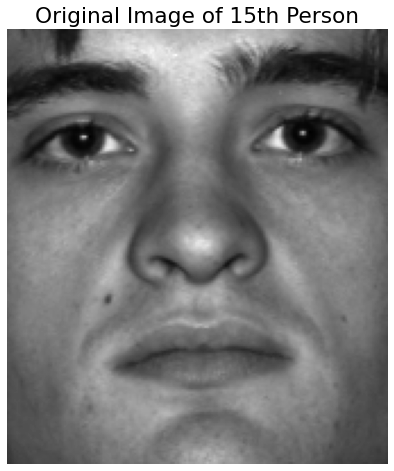

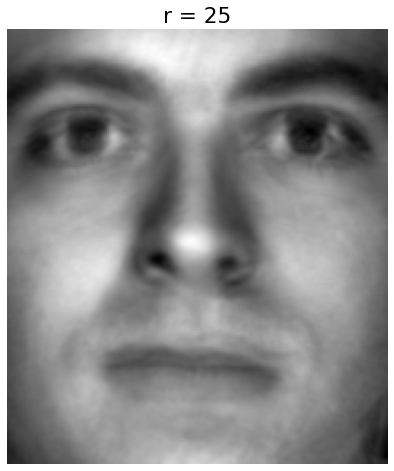

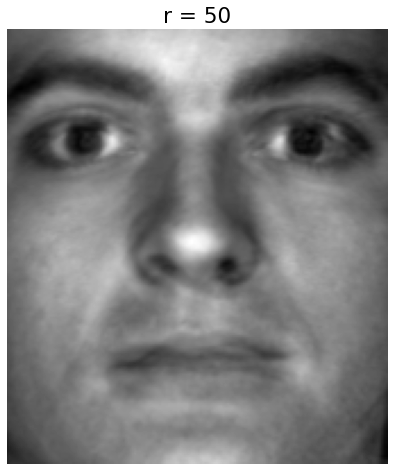

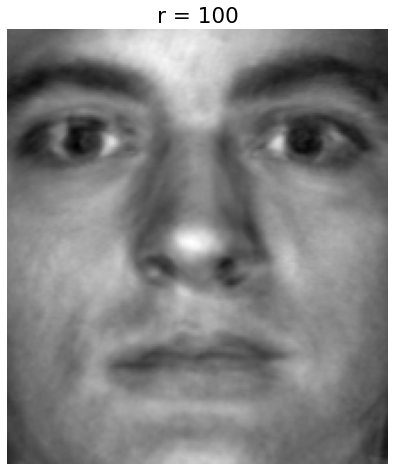

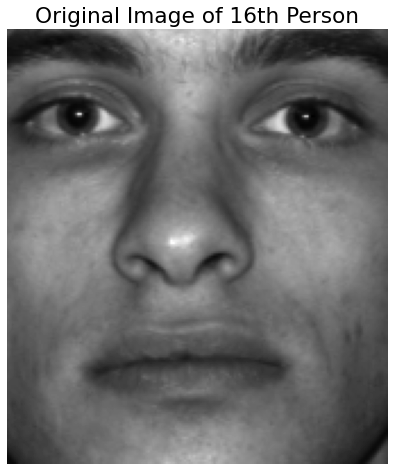

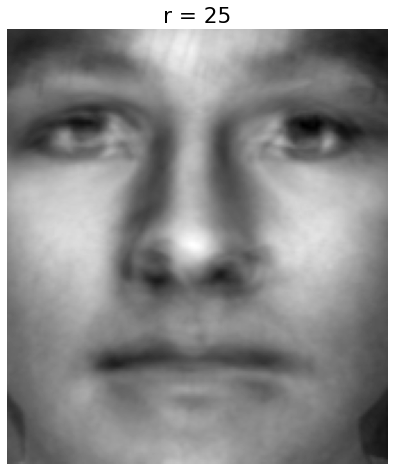

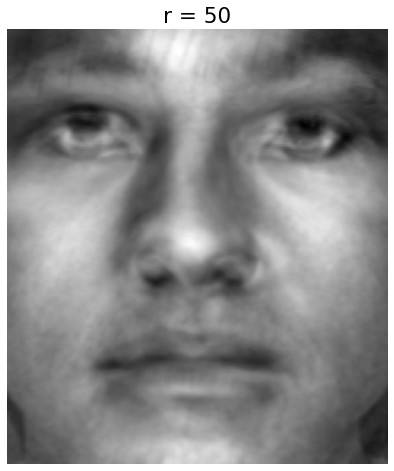

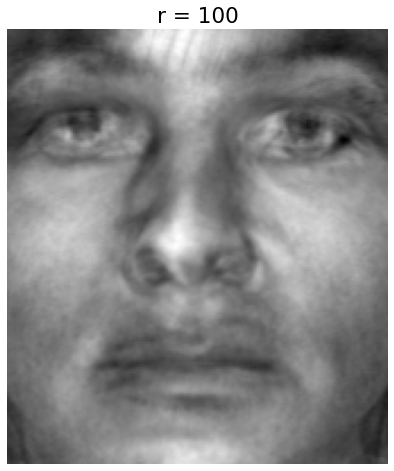

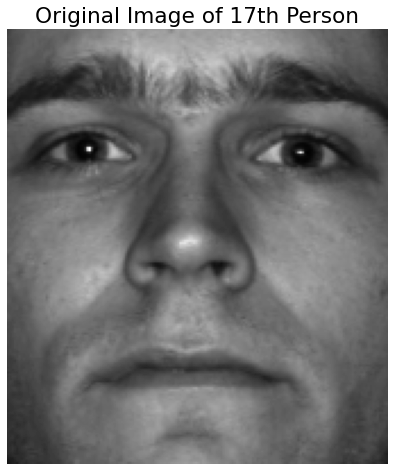

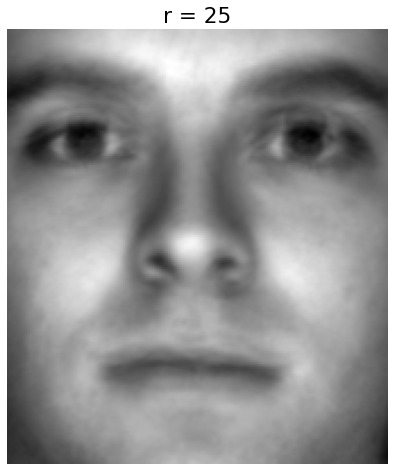

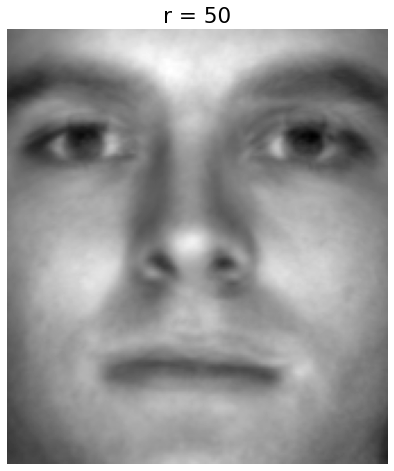

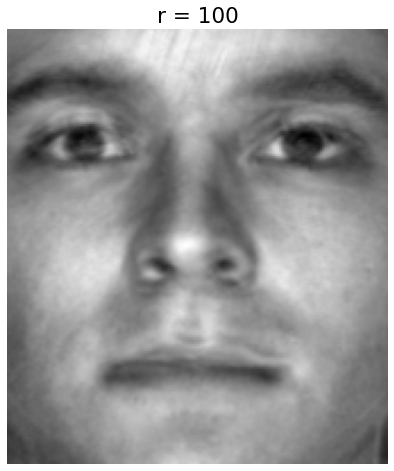

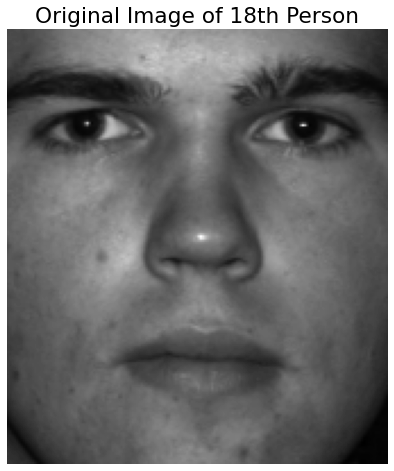

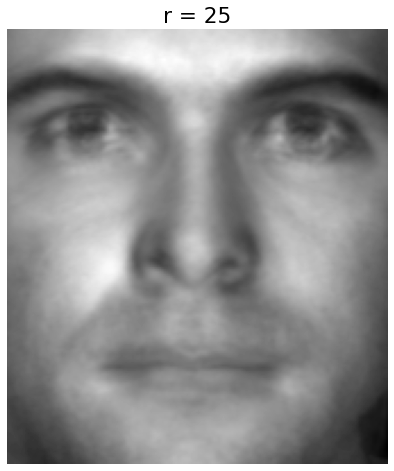

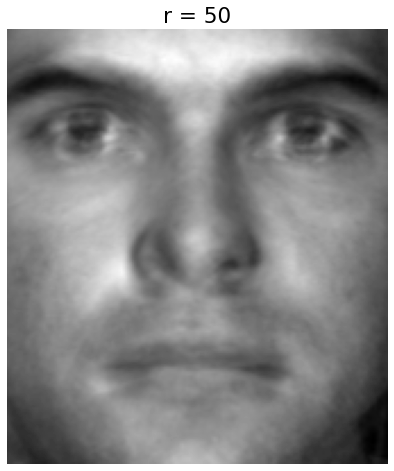

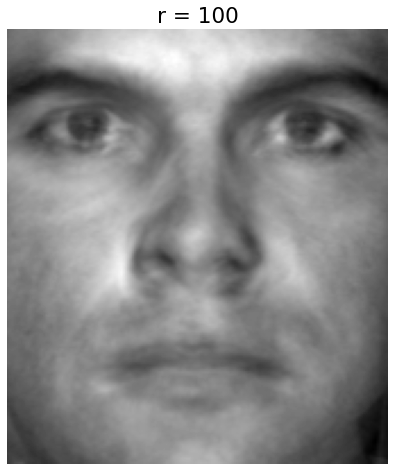

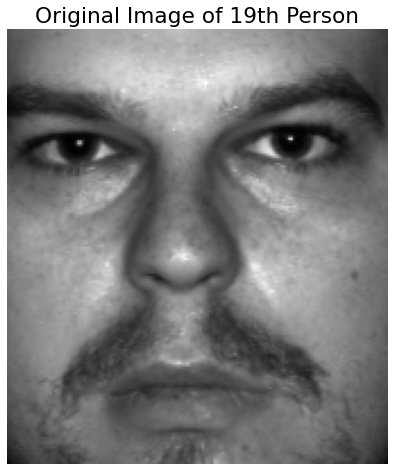

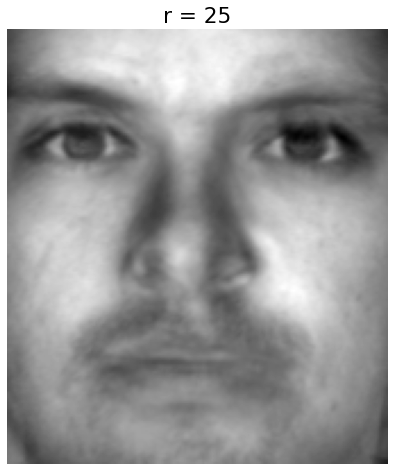

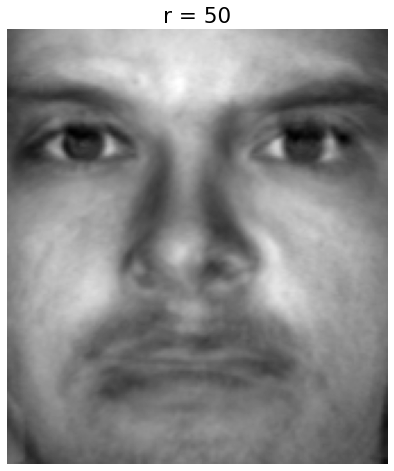

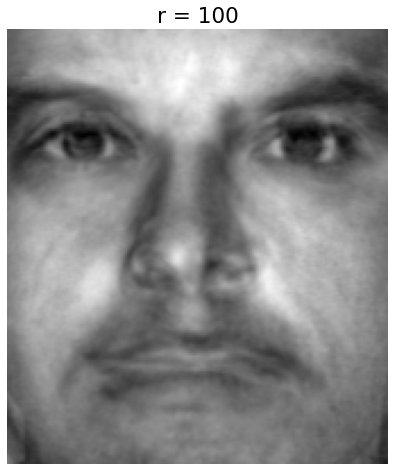

In [ ]:
# using 5 faces for testing
r_list = [25, 50, 100, 200, 400, 800, 1600]

for i in range(5):
  testFace = faces[:,np.sum(nfaces[:15+i])] 
  plt.imshow(np.reshape(testFace,(m,n)).T)
  plt.set_cmap('gray')
  plt.title('Original Image of ' + str(15+i) + 'th Person')
  plt.axis('off')
  plt.show()
  testFaceMS = testFace - avgFace

  for r in r_list:
      reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
      img = plt.imshow(np.reshape(reconFace,(m,n)).T)
      img.set_cmap('gray')
      plt.title('r = ' + str(r))
      plt.axis('off')
      plt.show()

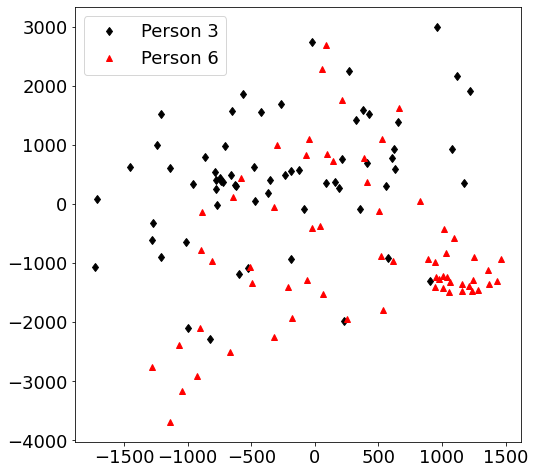

In [ ]:
## Project person 3 and 6 onto PC5 and PC6

P1 = faces[:,np.sum(nfaces[:(3-1)]):np.sum(nfaces[:3])]
P2 = faces[:,np.sum(nfaces[:(6-1)]):np.sum(nfaces[:6])]
P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T
PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Person 3')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 6')

plt.legend()
plt.show()